Se instala e importan las librerías requeridas

In [37]:
#%pip install tabulate
#%pip install openpyxl

In [38]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from tabulate import tabulate
import numpy as np
import matplotlib. pyplot as plt
import time

#-----Inicio de Reloj------------

In [39]:
start= time.time()

Se realiza un manejo previo de los datos a revisión

In [40]:
# ---------- Manejo de Datos ----------

# Cargar los datos desde el archivo Excel
df = pd.read_excel('datosdecodificados.xlsx', header=0)

BPM = "Latidos por minuto (BPM)"
Tiempo = "Tiempo(s)"
BER = "BER"

# Extraer los datos de la columna seleccionada
DatosLatidos = df["BPM"]
DatosTiempo = df["Tiempo(s)"]
DatosBER = df["BER"]

Se desarrollan algunas listas necesarias

In [41]:
# ---------- Zonas de Entrenamiento ----------

Zona1T = []
Zona1L = []
Zona2T = []
Zona2L = []
Zona3T = []
Zona3L = []
Zona4T = []
Zona4L = []
Zona5T = []
Zona5L = []


FCmax = max(DatosLatidos)
Z1 = round(FCmax*.65,2)
Z2 = round(FCmax*.8,2)
Z3 = round(FCmax*.85,2)
Z4 = round(FCmax*.95,2)
#Z5 = round(FCmax*.95,2)

cont = -1

for i in DatosLatidos:
    cont = cont+1
    if i < 0:
        continue
    elif i > 0 and i <= Z1:     # i < 65%
        Zona1T.append(DatosTiempo[cont])
        Zona1L.append(DatosLatidos[cont])
    elif i > Z1 and i <= Z2:    # 65% < i < 80%
        Zona2T.append(DatosTiempo[cont])
        Zona2L.append(DatosTiempo[cont])
    elif i > Z2 and i <= Z3:    # 80% < i < 85%
        Zona3T.append(DatosTiempo[cont])
        Zona3L.append(DatosTiempo[cont])
    elif i > Z3 and i <= Z4:    # 85% < i < 95%
        Zona4T.append(DatosTiempo[cont])
        Zona4L.append(DatosTiempo[cont])
    else:
        Zona5T.append(DatosTiempo[cont])
        Zona5L.append(DatosTiempo[cont])


Se realiza las tablas de las zonas

In [42]:
# ---------- Tablas de Zonas ----------

# Zona 1
headers = ["Tiempo", "Frecuencia"]
infotabla = list(zip(Zona1T, Zona1L))
tablaZ1 = tabulate(infotabla, headers, tablefmt="grid")

# Zona 2
headers = ["Tiempo", "Frecuencia"]
infotabla = list(zip(Zona2T, Zona2L))
tablaZ2 = tabulate(infotabla, headers, tablefmt="grid")

# Zona 3
headers = ["Tiempo", "Frecuencia"]
infotabla = list(zip(Zona3T, Zona3L))
tablaZ3 = tabulate(infotabla, headers, tablefmt="grid")

# Zona 4
headers = ["Tiempo", "Frecuencia"]
infotabla = list(zip(Zona4T, Zona4L))
tablaZ4 = tabulate(infotabla, headers, tablefmt="grid")

# Zona 5
headers = ["Tiempo", "Frecuencia"]
infotabla = list(zip(Zona5T, Zona5L))
tablaZ5 = tabulate(infotabla, headers, tablefmt="grid")

Información importante final

In [43]:
# ---------- Resultados ----------

print("Las zonas de frecuencias son:\n")
print("Frecuencia Cardíaca máxima: ", FCmax)
print("Calentamiento (Zona 1): Inferior a", Z1)
print("Quema Grasa (Zona 2): Entre ",Z1, " y ", Z2)
print("Aeróbica (Zona 3): Entre ",Z2, " y ", Z3)
print("Anaeróbica (Zona 4): Entre ", Z3, " y ", Z4)
print("Extrema (Zona 5): Superior a ", Z4,"\n")
print(" ----------------------------------------\n")

print("Las tablas resultantes para cada zona son:")
print("Tabla para Zona 1: Calentamiento: \n",tablaZ1)
print("Tabla para Zona 2: Quema Grasa: \n",tablaZ2)
print("Tabla para Zona 3: Aeróbica: \n",tablaZ3)
print("Tabla para Zona 4: Anaeróbica: \n",tablaZ4)
print("Tabla para Zona 5: Extrema: \n",tablaZ5)
print(" ----------------------------------------")



Las zonas de frecuencias son:

Frecuencia Cardíaca máxima:  164.8488696609948
Calentamiento (Zona 1): Inferior a 107.15
Quema Grasa (Zona 2): Entre  107.15  y  131.88
Aeróbica (Zona 3): Entre  131.88  y  140.12
Anaeróbica (Zona 4): Entre  140.12  y  156.61
Extrema (Zona 5): Superior a  156.61 

 ----------------------------------------

Las tablas resultantes para cada zona son:
Tabla para Zona 1: Calentamiento: 
 +----------+--------------+
|   Tiempo |   Frecuencia |
+==========+==============+
|        0 |      90.4359 |
+----------+--------------+
|       10 |      91.3756 |
+----------+--------------+
|       20 |      93.1771 |
+----------+--------------+
|       30 |      92.2531 |
+----------+--------------+
|       40 |      93.2972 |
+----------+--------------+
|       50 |      96.6334 |
+----------+--------------+
|       60 |      94.1089 |
+----------+--------------+
|       70 |      96.0891 |
+----------+--------------+
|       80 |      97.135  |
+----------+----------

Gráfica de BER

In [44]:
 #---------- Gráfica de Bit Error Rate----------

Iteraciones = []
DatosBER_req = list(DatosBER[0:118])
cont = 1

for i in DatosBER:
    if i > 0:
        Iteraciones.append(cont)
        cont = cont+1
    else:
        continue
print(Iteraciones)
print(DatosBER_req)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118]
[0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.0666666666666666, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.0666666666666666, 0.0666666666666666, 0.0666666666666666, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.13333333333333

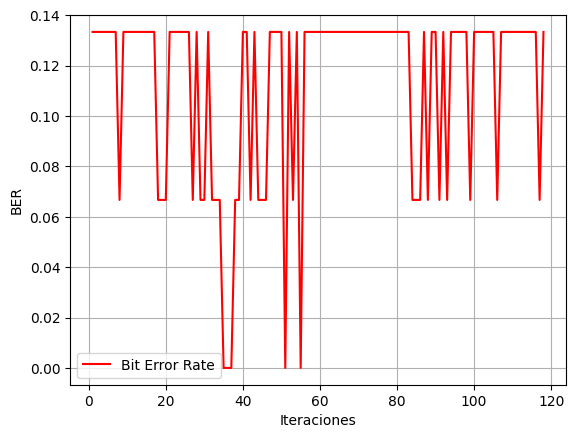

In [45]:
plt.figure()
plt.plot(Iteraciones, DatosBER_req,color='r', label="Bit Error Rate")
plt.xlabel("Iteraciones")
plt.ylabel("BER")
plt.legend()
plt.grid()
plt.show()

Gráfica de Latidos por Minuto

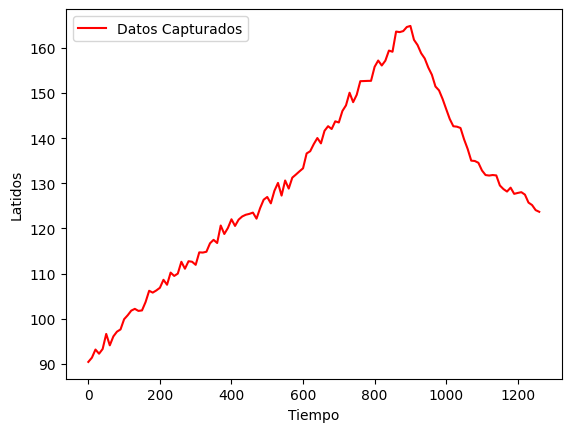

In [46]:
# ---------- Gráfica de Latidos por Minuto ----------

plt.figure()
plt.plot(DatosTiempo, DatosLatidos,color='r', label="Datos Capturados")
plt.xlabel("Tiempo")
plt.ylabel("Latidos")
plt.legend()
plt.show()


In [47]:
end= time.time()
tiempo = end-start
print('\n Tiempo de ejecucion', tiempo)


 Tiempo de ejecucion 0.2746291160583496
